In [3]:
import pandas as pd

df = pd.read_csv("../data/adult.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
columns = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

df.columns = columns

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
import numpy as np

In [6]:
# Replace '?' with NaN
df = df.replace("?", np.nan)

# Drop rows with missing values
df = df.dropna()

df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [7]:
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip()

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df["income"] = df["income"].apply(lambda x: 1 if x == ">50K" else 0)

df["income"].value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

In [9]:
df.shape

(32561, 15)

In [10]:
df["sex"].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

In [11]:
X = df.drop("income", axis=1)
y = df["income"]

X.head(), y.head()

(   age         workclass  fnlwgt  education  education_num  \
 0   39         State-gov   77516  Bachelors             13   
 1   50  Self-emp-not-inc   83311  Bachelors             13   
 2   38           Private  215646    HS-grad              9   
 3   53           Private  234721       11th              7   
 4   28           Private  338409  Bachelors             13   
 
        marital_status         occupation   relationship   race     sex  \
 0       Never-married       Adm-clerical  Not-in-family  White    Male   
 1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
 2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
 3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
 4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   
 
    capital_gain  capital_loss  hours_per_week native_country  
 0          2174             0              40  United-States  
 1             0             0          

In [12]:
categorical_cols = X.select_dtypes(include="object").columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

categorical_cols, numerical_cols

(Index(['workclass', 'education', 'marital_status', 'occupation',
        'relationship', 'race', 'sex', 'native_country'],
       dtype='object'),
 Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
        'hours_per_week'],
       dtype='object'))

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numerical_cols)
    ]
)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((26048, 14), (6513, 14))

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=300))
])

In [16]:
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

acc, prec, rec

(0.855980346998311, 0.7397260273972602, 0.6198979591836735)

In [18]:
# Get gender column from test set
gender_test = X_test["sex"]

gender_test.value_counts()

sex
Male      4355
Female    2158
Name: count, dtype: int64

In [19]:
import numpy as np

male_mask = (gender_test == "Male")
female_mask = (gender_test == "Female")

dp_male = y_pred[male_mask].mean()
dp_female = y_pred[female_mask].mean()

demographic_parity_gap = dp_male - dp_female

dp_male, dp_female, demographic_parity_gap

(np.float64(0.26039035591274395),
 np.float64(0.08341056533827618),
 np.float64(0.17697979057446778))

In [20]:
y_test_array = y_test.values

tpr_male = ((y_pred[male_mask] == 1) & (y_test_array[male_mask] == 1)).sum() / (y_test_array[male_mask] == 1).sum()
tpr_female = ((y_pred[female_mask] == 1) & (y_test_array[female_mask] == 1)).sum() / (y_test_array[female_mask] == 1).sum()

equal_opportunity_gap = tpr_male - tpr_female

tpr_male, tpr_female, equal_opportunity_gap

(np.float64(0.6296296296296297),
 np.float64(0.5673469387755102),
 np.float64(0.062282690854119416))

In [21]:
train_df = X_train.copy()
train_df["income"] = y_train.values

train_df["sex"].value_counts()

sex
Male      17435
Female     8613
Name: count, dtype: int64

In [22]:
male_train = train_df[train_df["sex"] == "Male"]
female_train = train_df[train_df["sex"] == "Female"]

male_train.shape, female_train.shape

((17435, 15), (8613, 15))

In [23]:
female_oversampled = female_train.sample(len(male_train), replace=True, random_state=42)

balanced_train = pd.concat([male_train, female_oversampled]).sample(frac=1, random_state=42)

balanced_train["sex"].value_counts()

sex
Female    17435
Male      17435
Name: count, dtype: int64

In [24]:
X_train_bal = balanced_train.drop("income", axis=1)
y_train_bal = balanced_train["income"]

In [25]:
model_balanced = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=300))
])

model_balanced.fit(X_train_bal, y_train_bal)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [26]:
y_pred_bal = model_balanced.predict(X_test)

acc_bal = accuracy_score(y_test, y_pred_bal)
prec_bal = precision_score(y_test, y_pred_bal)
rec_bal = recall_score(y_test, y_pred_bal)

acc_bal, prec_bal, rec_bal

(0.8550591125441425, 0.7367223065250379, 0.6192602040816326)

In [27]:
dp_male_bal = y_pred_bal[male_mask].mean()
dp_female_bal = y_pred_bal[female_mask].mean()
dp_gap_bal = dp_male_bal - dp_female_bal

tpr_male_bal = ((y_pred_bal[male_mask] == 1) & (y_test_array[male_mask] == 1)).sum() / (y_test_array[male_mask] == 1).sum()
tpr_female_bal = ((y_pred_bal[female_mask] == 1) & (y_test_array[female_mask] == 1)).sum() / (y_test_array[female_mask] == 1).sum()
eo_gap_bal = tpr_male_bal - tpr_female_bal

dp_male_bal, dp_female_bal, dp_gap_bal, tpr_male_bal, tpr_female_bal, eo_gap_bal

(np.float64(0.2606199770378875),
 np.float64(0.08480074142724744),
 np.float64(0.17581923561064003),
 np.float64(0.6296296296296297),
 np.float64(0.563265306122449),
 np.float64(0.06636432350718069))

In [28]:
import pandas as pd

results_baseline = pd.DataFrame({
    "metric": ["accuracy", "precision", "recall", "dp_gap", "eo_gap"],
    "value": [acc, prec, rec, demographic_parity_gap, equal_opportunity_gap]
})

results_mitigated = pd.DataFrame({
    "metric": ["accuracy", "precision", "recall", "dp_gap", "eo_gap"],
    "value": [acc_bal, prec_bal, rec_bal, dp_gap_bal, eo_gap_bal]
})

results_baseline.to_csv("../reports/baseline_results.csv", index=False)
results_mitigated.to_csv("../reports/mitigation_results.csv", index=False)

results_baseline, results_mitigated

(      metric     value
 0   accuracy  0.855980
 1  precision  0.739726
 2     recall  0.619898
 3     dp_gap  0.176980
 4     eo_gap  0.062283,
       metric     value
 0   accuracy  0.855059
 1  precision  0.736722
 2     recall  0.619260
 3     dp_gap  0.175819
 4     eo_gap  0.066364)

In [29]:
import os

os.makedirs("../reports/figures", exist_ok=True)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sex
Male      21790
Female    10771
Name: count, dtype: int64


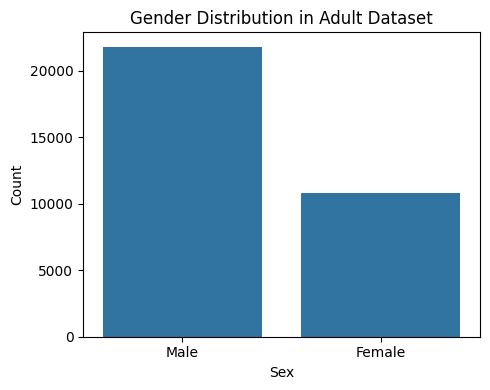

In [32]:
# Gender counts
print(df["sex"].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(data=df, x="sex")
plt.title("Gender Distribution in Adult Dataset")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../reports/figures/gender_distribution.png", dpi=300)
plt.show()

income
0    24720
1     7841
Name: count, dtype: int64


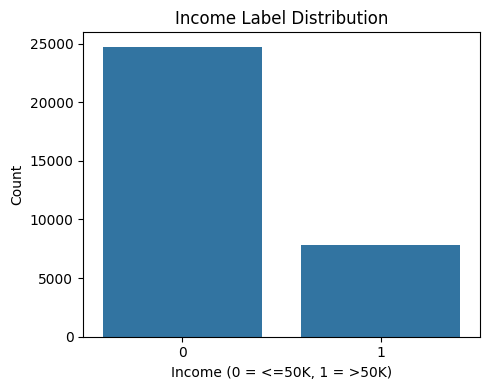

In [33]:
# Income counts (0 = <=50K, 1 = >50K)
print(df["income"].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(data=df, x="income")
plt.title("Income Label Distribution")
plt.xlabel("Income (0 = <=50K, 1 = >50K)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../reports/figures/income_distribution.png", dpi=300)
plt.show()

sex
Female    0.109461
Male      0.305737
Name: income, dtype: float64


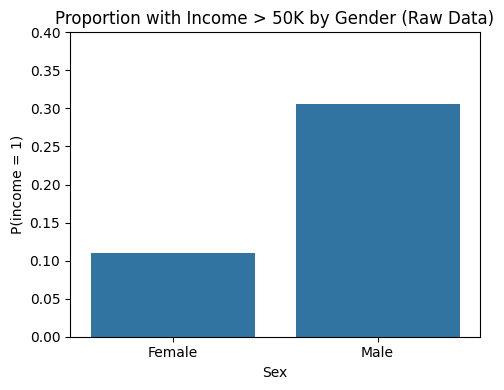

In [34]:
income_by_sex = df.groupby("sex")["income"].mean()
print(income_by_sex)

plt.figure(figsize=(5,4))
sns.barplot(x=income_by_sex.index, y=income_by_sex.values)
plt.title("Proportion with Income > 50K by Gender (Raw Data)")
plt.ylabel("P(income = 1)")
plt.xlabel("Sex")
plt.ylim(0, 0.4)
plt.tight_layout()
plt.savefig("../reports/figures/income_by_gender_raw.png", dpi=300)
plt.show()

In [35]:
metrics_compare = pd.DataFrame({
    "accuracy": [acc, acc_bal],
    "precision": [prec, prec_bal],
    "recall": [rec, rec_bal],
    "dp_gap": [demographic_parity_gap, dp_gap_bal],
    "eo_gap": [equal_opportunity_gap, eo_gap_bal]
}, index=["baseline", "balanced"])

metrics_compare

,accuracy,precision,recall,dp_gap,eo_gap
baseline,0.855980,0.739726,0.619898,0.176980,0.062283
balanced,0.855059,0.736722,0.619260,0.175819,0.066364


In [36]:
metrics_compare.to_csv("../reports/metrics_comparison.csv")

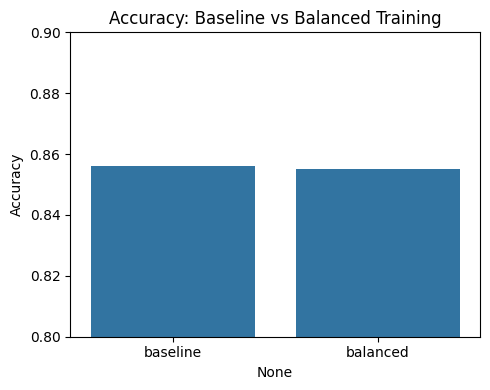

In [37]:
plt.figure(figsize=(5,4))
sns.barplot(x=metrics_compare.index, y=metrics_compare["accuracy"].values)
plt.title("Accuracy: Baseline vs Balanced Training")
plt.ylabel("Accuracy")
plt.ylim(0.8, 0.9)
plt.tight_layout()
plt.savefig("../reports/figures/accuracy_comparison.png", dpi=300)
plt.show()

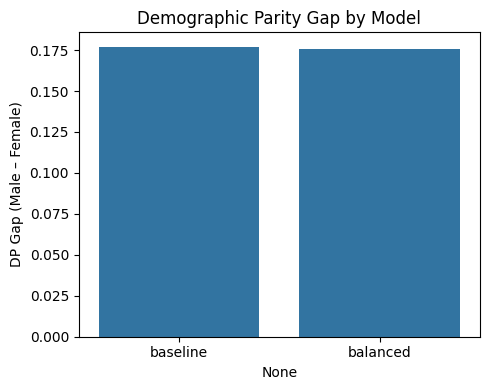

In [38]:
plt.figure(figsize=(5,4))
sns.barplot(x=metrics_compare.index, y=metrics_compare["dp_gap"].values)
plt.title("Demographic Parity Gap by Model")
plt.ylabel("DP Gap (Male – Female)")
plt.tight_layout()
plt.savefig("../reports/figures/dp_gap_comparison.png", dpi=300)
plt.show()

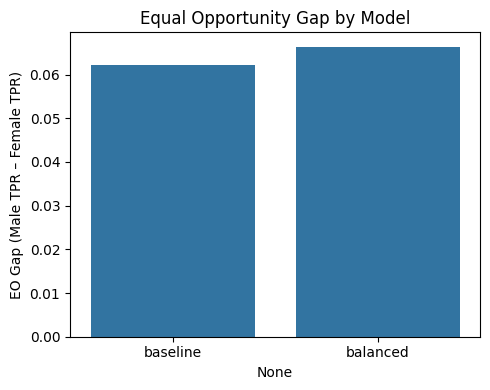

In [39]:
plt.figure(figsize=(5,4))
sns.barplot(x=metrics_compare.index, y=metrics_compare["eo_gap"].values)
plt.title("Equal Opportunity Gap by Model")
plt.ylabel("EO Gap (Male TPR – Female TPR)")
plt.tight_layout()
plt.savefig("../reports/figures/eo_gap_comparison.png", dpi=300)
plt.show()